### Problem Statement:
A dataset of marketing campaingn is provided which contains the customers personal data and the spending on different products. The task is to classify the customers into differecnt clusters according to their similar possible actions to predict thier future and to help the company to offer better discount and other offers to individual targeted groups.

### Importing libraries and dataset

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project4: Clustering/marketing_campaign.csv')

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # Display all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project4: Clustering/marketing_campaign.csv')

### Understanding the data

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### Note: 
1. No null value
2. 3 object or string type, 1 float type and 25 integer type features(columns)

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


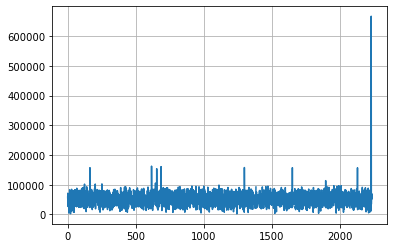

In [ ]:
df['Income'].plot.line()
plt.grid()

In [ ]:
df[df['Income']>170000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


### Note: 
1. Outlier in Income: 666666, which is only one after 160000

##### Oultier Treatment

In [ ]:
# Let's remove the outlier in income
df1 = df[df['Income']<170000]

<AxesSubplot:>

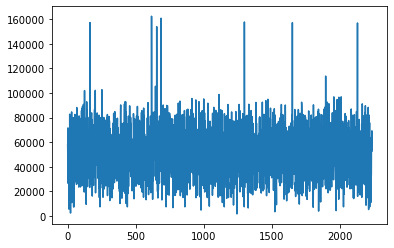

In [ ]:
df1['Income'].plot.line()
# Note: If required, more outlier could be removed further

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Univariate analysis

Text(0, 0.5, 'Count')

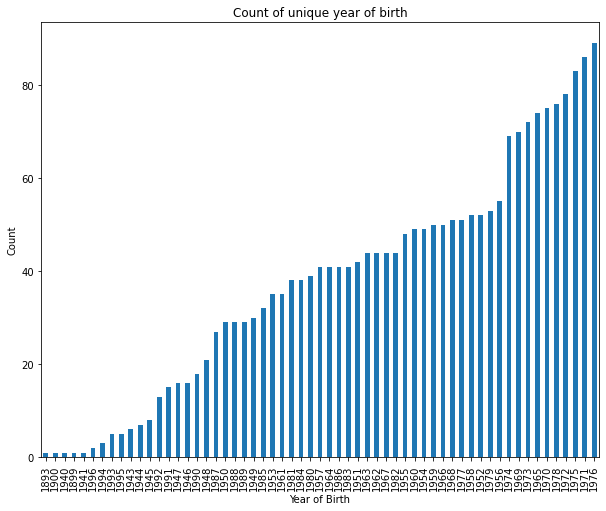

In [ ]:
# 1. Year of Birth 
plt.rcParams['figure.figsize'] = (10,8)
df1['Year_Birth'].value_counts().sort_values().plot.bar()
plt.title('Count of unique year of birth')
plt.xlabel('Year of Birth')
plt.ylabel('Count')

Note: There are some outliers in year of birth, since someone born before 1940 have rare chance of surving

In [ ]:
df2 = df1[df1['Year_Birth']>=1940]

In [ ]:
# 2. Education
df2['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [ ]:
# 3. Marital Status
df2['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

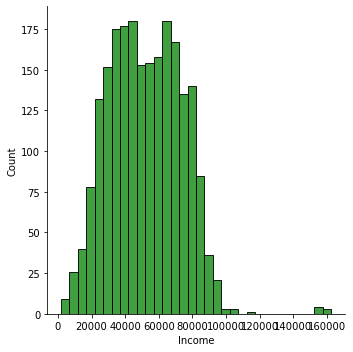

In [ ]:
# 4. Income
sns.displot(df2['Income'], color="g")

In [ ]:
# 5. Dt_Customer - date of customer’s enrolment with the company
# Let's extract year, month and weekday from it
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])

<ipython-input-18-e47ff4e46ecc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])


In [ ]:
df2['year'] = df2['Dt_Customer'].dt.year
df2['month'] = df2['Dt_Customer'].dt.month
df2['weekday'] = df2['Dt_Customer'].dt.weekday

<ipython-input-19-2cca0e9c723a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['Dt_Customer'].dt.year
<ipython-input-19-2cca0e9c723a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['Dt_Customer'].dt.month
<ipython-input-19-2cca0e9c723a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df2['Dt_Customer'] = df2['Dt_Customer'].astype(str)

<ipython-input-20-1e594a14f050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dt_Customer'] = df2['Dt_Customer'].astype(str)


In [ ]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,weekday
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,5
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,4


In [ ]:
df2['year'].value_counts().sort_index()

2012     490
2013    1170
2014     552
Name: year, dtype: int64

<AxesSubplot:>

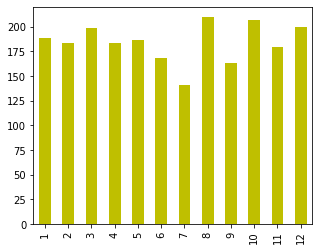

In [ ]:
plt.figure(figsize=(5,4))
df2['month'].value_counts().sort_index(0).plot.bar(color="y")

<AxesSubplot:>

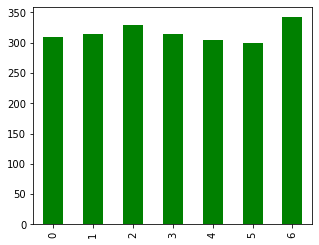

In [ ]:
plt.figure(figsize=(5,4))
df2['weekday'].value_counts().sort_index().plot.bar(color='g')

In [ ]:
# 6. Kidhome
df2['Kidhome'].value_counts()

0    1281
1     885
2      46
Name: Kidhome, dtype: int64

In [ ]:
# 7. Teenhome
df2['Teenhome'].value_counts()

0    1144
1    1017
2      51
Name: Teenhome, dtype: int64

Note:
1. There are more families with more teens than kids.
2. Most of the families have one kid or one teen or both.

Text(0.5, 0, 'Percentage of customers')

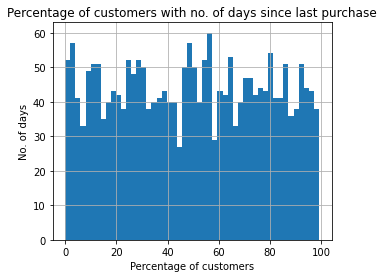

In [ ]:
# 8. Recency - number of days since the last purchase
df2['Recency'].hist(bins=50, figsize=(5,4))
plt.title('Percentage of customers with no. of days since last purchase')
plt.ylabel('No. of days')
plt.xlabel('Percentage of customers')

Text(0, 0.5, 'amount spent in USD')

<Figure size 2160x1440 with 0 Axes>

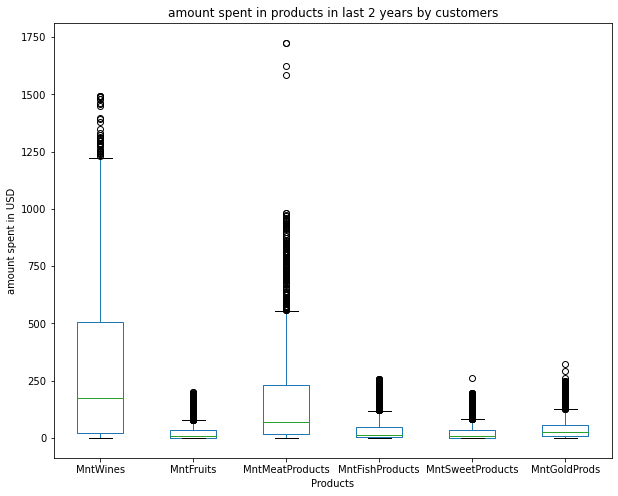

In [ ]:
# 9 . Amount spent in different products 
amount_spent_features = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

plt.figure(figsize=(30,20))
df2[amount_spent_features].plot.box(figsize=(10,8))
plt.title('amount spent in products in last 2 years by customers')
plt.xlabel('Products')
plt.ylabel('amount spent in USD')

Text(0, 0.5, 'Number of purchases')

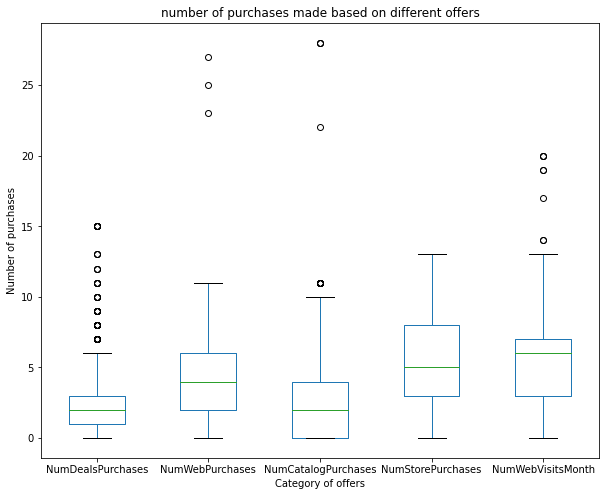

In [ ]:
# 10. Number of purchases with categorised offers
number_purchase_features = ['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df2[number_purchase_features].plot.box(figsize=(10,8))
plt.title('number of purchases made based on different offers')
plt.xlabel('Category of offers')
plt.ylabel('Number of purchases')

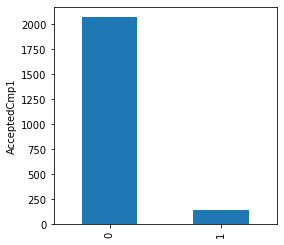

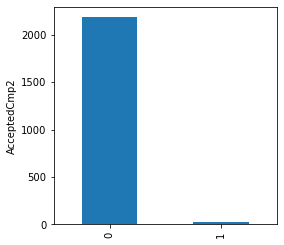

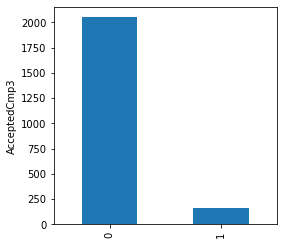

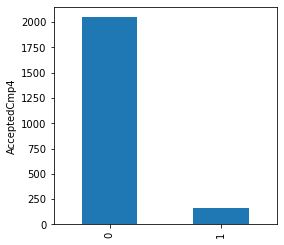

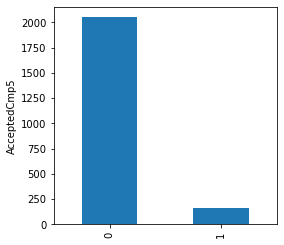

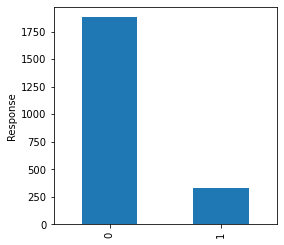

In [ ]:
# 11. Offer accepted in particular offer
offer_accepted_feature = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5',  'Response']

for elem in offer_accepted_feature:
    plt.figure(figsize=(4,4))
    fig = (df2[elem].value_counts().sort_index()).plot.bar()
    fig.set_ylabel(f'{elem}')

In [ ]:
# 12. Complains in the last 2 years
plt.figure(figsize=(4,4))
df2['Complain'].value_counts()

0    2192
1      20
Name: Complain, dtype: int64

<Figure size 288x288 with 0 Axes>

### Adding more features based on existing features

In [ ]:
# Age of customers
from datetime import date
df2['Age'] = date.today().year - df2['Year_Birth']

<ipython-input-32-011e9ec177b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'] = date.today().year - df2['Year_Birth']


<AxesSubplot:>

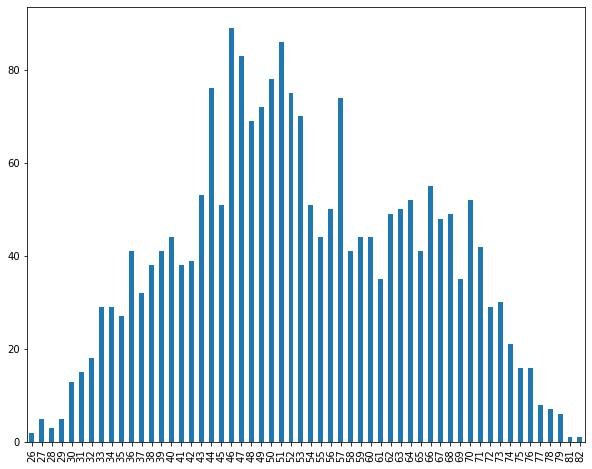

In [ ]:
df2['Age'].value_counts().sort_index(0).plot.bar()

In [ ]:
# Total spending on all products
amount_spent_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df2['Total_spend'] = df2[amount_spent_features[0]] + df2[amount_spent_features[1]] + df2[amount_spent_features[2]] + df2[amount_spent_features[3]] + df2[amount_spent_features[4]] + df2[amount_spent_features[5]]

<ipython-input-34-d0380360e36d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_spend'] = df2[amount_spent_features[0]] + df2[amount_spent_features[1]] + df2[amount_spent_features[2]] + df2[amount_spent_features[3]] + df2[amount_spent_features[4]] + df2[amount_spent_features[5]]


<AxesSubplot:ylabel='Frequency'>

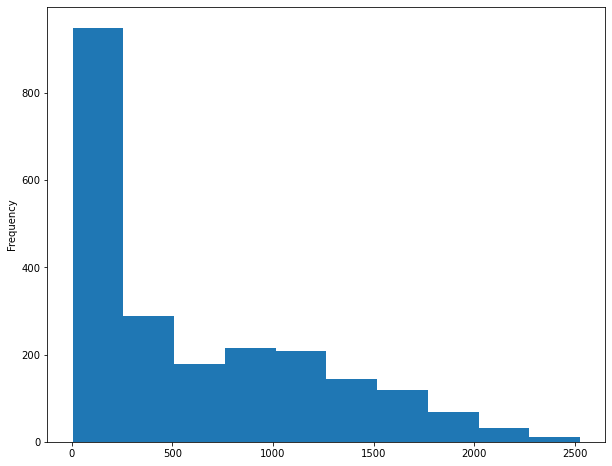

In [ ]:
df2['Total_spend'].plot.hist()

In [ ]:
# Total childrens of a customer
df2['Total_childrens'] = df2['Kidhome'] + df2['Teenhome']

<ipython-input-36-3d897ee00566>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_childrens'] = df2['Kidhome'] + df2['Teenhome']


<AxesSubplot:>

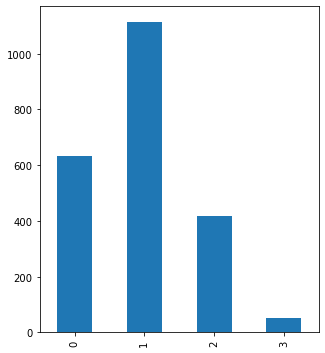

In [ ]:
plt.figure(figsize=(5,6))
df2['Total_childrens'].value_counts().sort_index(0).plot.bar()

### Bivariate Analysis

In [ ]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,weekday,Age,Total_spend,Total_childrens
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,0,65,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,6,68,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,2,57,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,3,38,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,6,41,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,3,55,1341,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,0,76,444,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,5,41,1241,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,4,66,843,1


In [ ]:
df2.shape

(2212, 35)

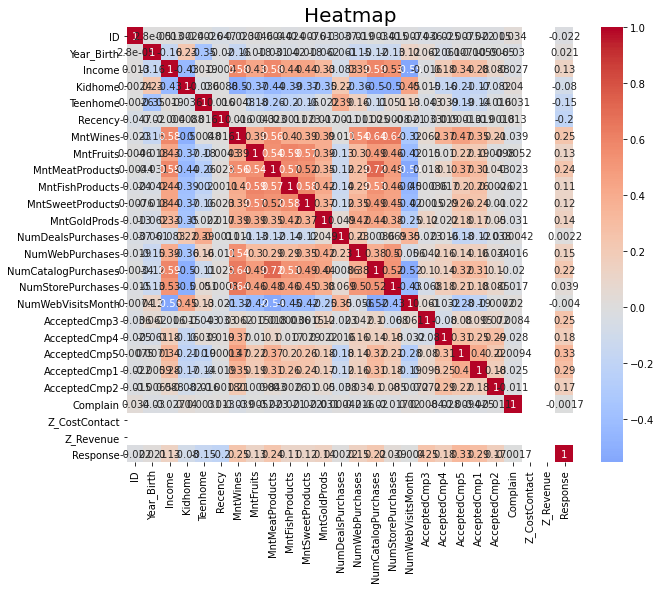

In [ ]:
# Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (10,8)
plt.show()

Text(0.5, 0, 'Total Spend')

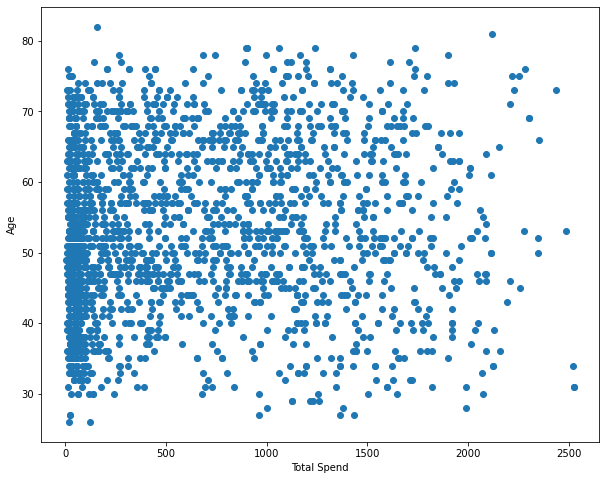

In [ ]:
# 1. Age vs total spend
x = df2['Total_spend']
y = df2['Age']
plt.scatter(x, y)
plt.ylabel('Age')
plt.xlabel('Total Spend')

Text(0, 0.5, 'Total Spend')

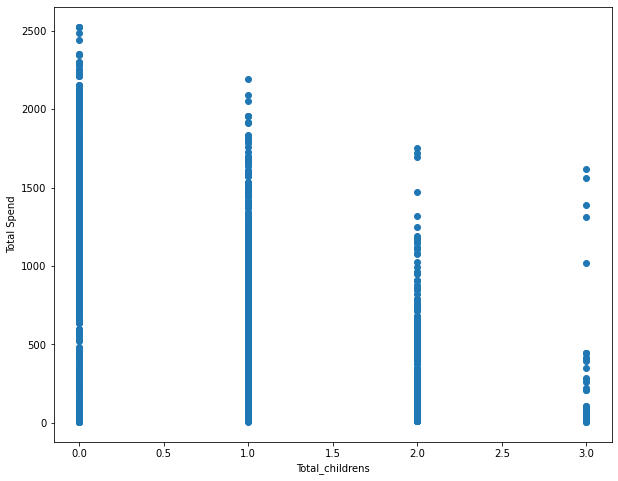

In [ ]:
# 2. Total Children vs total spend
y = df2['Total_spend']
x = df2['Total_childrens']
plt.scatter(x, y)
plt.xlabel('Total_childrens')
plt.ylabel('Total Spend')

Text(0, 0.5, 'Total Spend')

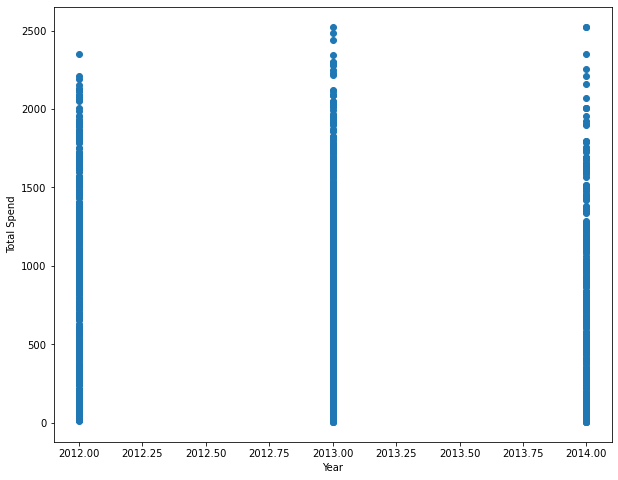

In [ ]:
# 3. year vs total spending
y = df2['Total_spend']
x = df2['year']
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Total Spend')

Text(0, 0.5, 'Total Spend')

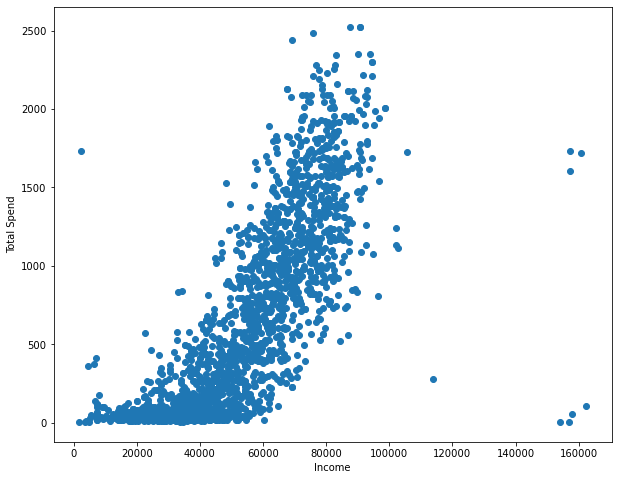

In [ ]:
# 4. Income vs total spending
y = df2['Total_spend']
x = df2['Income']
plt.scatter(x, y)
plt.xlabel('Income')
plt.ylabel('Total Spend')

Text(0, 0.5, 'Total Spend')

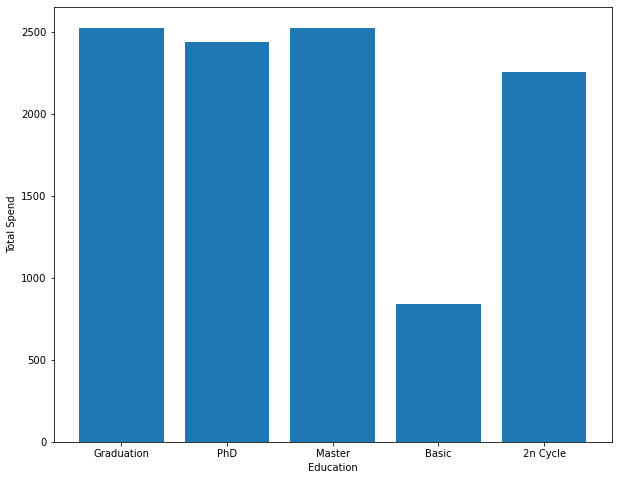

In [ ]:
# 5. Education vs speding
y = df2['Total_spend']
x = df2['Education']
plt.bar(x, y)
plt.xlabel('Education')
plt.ylabel('Total Spend')

# Building ML Model
Goal - Customer Segmentation

### Feature Engineering

In [ ]:
df2.drop(['Year_Birth','Dt_Customer'], axis=1, inplace=True)

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df2.drop(['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [ ]:
df2 = pd.get_dummies(df2)

In [ ]:
df2.shape

(2212, 38)

In [ ]:
df2

,ID,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,weekday,Age,Total_spend,Total_childrens,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,0,65,1617,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,6,68,27,2,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,2,57,776,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,3,38,53,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,6,41,422,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,3,55,1341,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,4001,64014.0,2,1,56,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,0,76,444,3,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,7270,56981.0,0,0,91,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,5,41,1241,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,8235,69245.0,0,1,8,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,4,66,843,1,0,0,0,1,0,0,0,0,0,0,1,0,0


### Applying the model

# 1. Income vs Total spend

In [ ]:
# Taking 2 columns into consideration and creating 2D plot
x1 = df2.loc[:,['Income','Total_spend']].values
x1

array([[5.8138e+04, 1.6170e+03],
       [4.6344e+04, 2.7000e+01],
       [7.1613e+04, 7.7600e+02],
       ...,
       [5.6981e+04, 1.2410e+03],
       [6.9245e+04, 8.4300e+02],
       [5.2869e+04, 1.7200e+02]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1=sc.fit_transform(x1)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km1=KMeans(n_clusters=i, init='k-means++', random_state=0)
    km1.fit(X1)
    wcss.append(km1.inertia_)

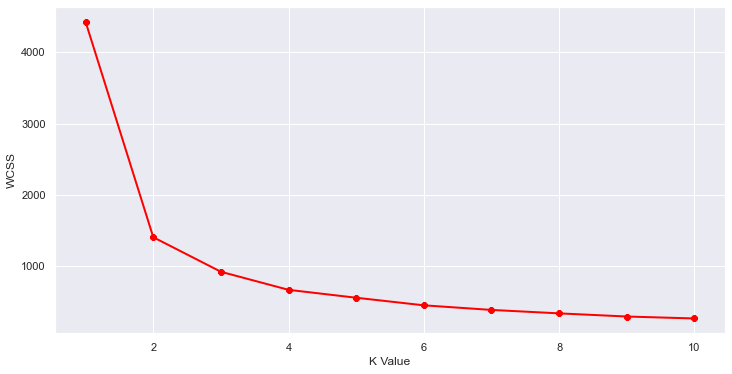

In [ ]:
#The elbow curve
sns.set()
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Taking 4 clusters
km1=KMeans(n_clusters=4, init='k-means++',random_state=0)
#predicting the labels of the input data
y1=km1.fit_predict(x1)
print(y1)

[2 0 2 ... 2 2 2]


In [ ]:
#adding the labels to a column named label
df2["cluster_type1"] = y1
#The new dataframe with the clustering done
df_cat = df2.sort_values('cluster_type1', ascending=True)
df_cat # dataframe sorted with the customer categories 

,ID,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,weekday,Age,Total_spend,Total_childrens,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster_type1
692,450,42315.0,0,1,90,3,1,4,4,3,0,0,0,0,0,0,3,11,0,2013,12,5,64,270,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
778,2461,51124.0,1,1,79,2,1,0,3,3,0,0,0,0,0,0,3,11,0,2013,12,2,67,43,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1724,1381,38513.0,1,0,20,5,6,1,5,8,0,0,0,0,0,0,3,11,1,2014,1,1,40,324,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
781,10839,36283.0,1,1,42,2,1,0,3,4,0,0,0,0,0,0,3,11,0,2014,4,0,46,29,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1718,10640,44392.0,1,1,71,5,4,1,4,7,0,0,0,0,0,0,3,11,0,2013,5,3,48,211,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,1160,13260.0,1,1,48,4,3,0,3,8,0,0,0,0,0,0,3,11,0,2013,8,4,52,49,2,0,0,1,0,0,0,0,0,1,0,0,0,0,3
1104,4444,30023.0,1,0,28,1,2,0,3,8,0,0,0,0,0,0,3,11,0,2014,3,0,50,61,1,0,0,1,0,0,0,0,0,1,0,0,0,0,3
583,5123,27450.0,0,0,57,1,2,1,3,7,0,0,0,0,0,0,3,11,0,2013,4,0,71,143,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3
1975,10311,4428.0,0,1,0,0,25,0,0,1,0,0,0,0,0,0,3,11,0,2013,5,4,53,359,1,0,0,1,0,0,0,0,0,1,0,0,0,0,3


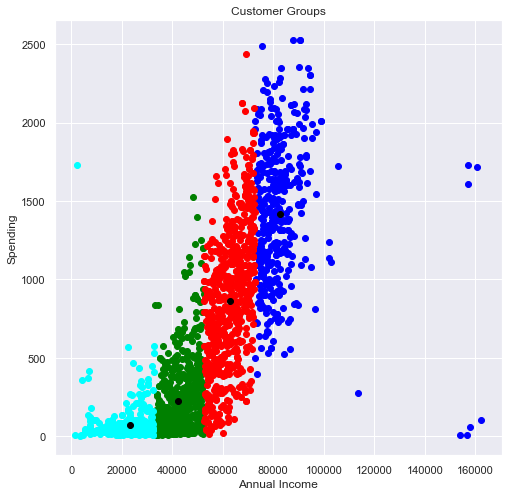

In [ ]:
#Visualizing the clusters
# Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x1[y1==0,0], x1[y1==0,1], c='green', label='Cluster1')
plt.scatter(x1[y1==1,0], x1[y1==1,1], c='blue', label='Cluster2')
plt.scatter(x1[y1==2,0], x1[y1==2,1], c='red', label='Cluster3')
plt.scatter(x1[y1==3,0], x1[y1==3,1], c='cyan', label='Cluster4')

#In case more clusters required
#plt.scatter(x[y==4,0], x[y==4,1], c='violet', label='Cluster1')
#plt.scatter(x[y==5,0], x[y==5,1], c='yellow', label='Cluster2')
#plt.scatter(x[y==6,0], x[y==6,1], c='purple', label='Cluster3')
#plt.scatter(x[y==7,0], x[y==7,1], c='orange', label='Cluster4')
#plt.scatter(x[y==8,0], x[y==8,1], c='black', label='Cluster3')
#plt.scatter(x[y==9,0], x[y==9,1], c='blue', label='Cluster4')


# Ploting the centroids
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.show()

# 2. Income vs Age

In [ ]:
# Taking 2 columns into consideration and creating 2D plot
x2 = df2.loc[:,['Income','Age']].values
x2

array([[5.8138e+04, 6.5000e+01],
       [4.6344e+04, 6.8000e+01],
       [7.1613e+04, 5.7000e+01],
       ...,
       [5.6981e+04, 4.1000e+01],
       [6.9245e+04, 6.6000e+01],
       [5.2869e+04, 6.8000e+01]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X2=sc.fit_transform(x2)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km2=KMeans(n_clusters=i, init='k-means++', random_state=0)
    km2.fit(X2)
    wcss.append(km2.inertia_)

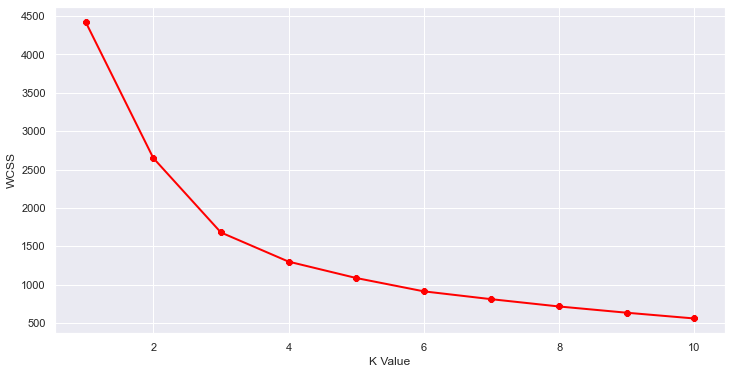

In [ ]:
#The elbow curve
sns.set()
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Taking 4 clusters
km2=KMeans(n_clusters=4, init='k-means++',random_state=0)
#predicting the labels of the input data
y2=km2.fit_predict(x2)
print(y2)

[2 0 2 ... 2 2 2]


In [ ]:
#adding the labels to a column named label
df2["cluster_type2"] = y2
#The new dataframe with the clustering done
df_cat = df2.sort_values('cluster_type2', ascending=True)
df_cat # dataframe sorted with the customer categories 

,ID,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,weekday,Age,Total_spend,Total_childrens,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster_type1,cluster_type2
692,450,42315.0,0,1,90,3,1,4,4,3,0,0,0,0,0,0,3,11,0,2013,12,5,64,270,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
778,2461,51124.0,1,1,79,2,1,0,3,3,0,0,0,0,0,0,3,11,0,2013,12,2,67,43,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1724,1381,38513.0,1,0,20,5,6,1,5,8,0,0,0,0,0,0,3,11,1,2014,1,1,40,324,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
781,10839,36283.0,1,1,42,2,1,0,3,4,0,0,0,0,0,0,3,11,0,2014,4,0,46,29,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1718,10640,44392.0,1,1,71,5,4,1,4,7,0,0,0,0,0,0,3,11,0,2013,5,3,48,211,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,1160,13260.0,1,1,48,4,3,0,3,8,0,0,0,0,0,0,3,11,0,2013,8,4,52,49,2,0,0,1,0,0,0,0,0,1,0,0,0,0,3,3
1104,4444,30023.0,1,0,28,1,2,0,3,8,0,0,0,0,0,0,3,11,0,2014,3,0,50,61,1,0,0,1,0,0,0,0,0,1,0,0,0,0,3,3
583,5123,27450.0,0,0,57,1,2,1,3,7,0,0,0,0,0,0,3,11,0,2013,4,0,71,143,0,0,0,0,1,0,0,0,0,1,0,0,0,0,3,3
1975,10311,4428.0,0,1,0,0,25,0,0,1,0,0,0,0,0,0,3,11,0,2013,5,4,53,359,1,0,0,1,0,0,0,0,0,1,0,0,0,0,3,3


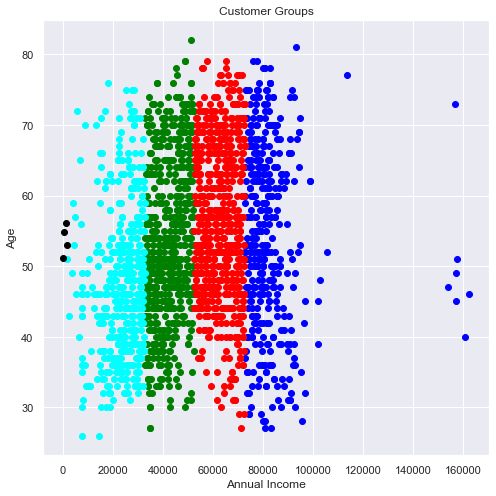

In [ ]:
#Visualizing the clusters
# Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x2[y2==0,0], x2[y2==0,1], c='green', label='Cluster1')
plt.scatter(x2[y2==1,0], x2[y2==1,1], c='blue', label='Cluster2')
plt.scatter(x2[y2==2,0], x2[y2==2,1], c='red', label='Cluster3')
plt.scatter(x2[y2==3,0], x2[y2==3,1], c='cyan', label='Cluster4')

#In case more clusters required
#plt.scatter(x[y==4,0], x[y==4,1], c='violet', label='Cluster1')
#plt.scatter(x[y==5,0], x[y==5,1], c='yellow', label='Cluster2')
#plt.scatter(x[y==6,0], x[y==6,1], c='purple', label='Cluster3')
#plt.scatter(x[y==7,0], x[y==7,1], c='orange', label='Cluster4')
#plt.scatter(x[y==8,0], x[y==8,1], c='black', label='Cluster3')
#plt.scatter(x[y==9,0], x[y==9,1], c='blue', label='Cluster4')


# Ploting the centroids
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.show()

# 3. Age vs Spending

In [ ]:
# Taking 2 columns into consideration and creating 2D plot
x3 = df2.loc[:,['Total_spend','Age']].values
x3

array([[1617,   65],
       [  27,   68],
       [ 776,   57],
       ...,
       [1241,   41],
       [ 843,   66],
       [ 172,   68]], dtype=int64)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X3=sc.fit_transform(x3)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km3=KMeans(n_clusters=i, init='k-means++', random_state=0)
    km3.fit(X3)
    wcss.append(km3.inertia_)

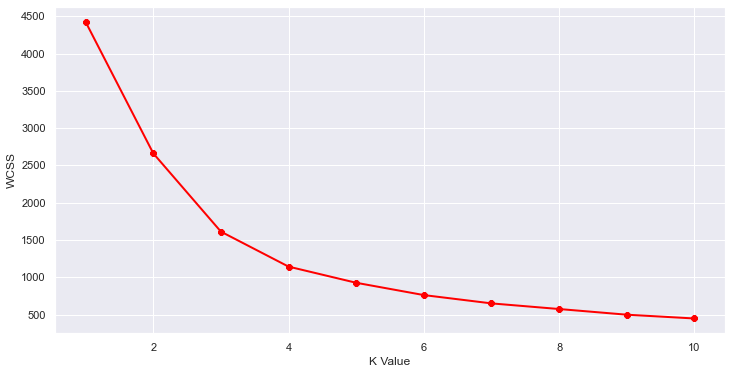

In [ ]:
#The elbow curve
sns.set()
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#Taking 4 clusters
km3=KMeans(n_clusters=4, init='k-means++',random_state=0)
#predicting the labels of the input data
y3=km2.fit_predict(x3)
print(y3)

[2 1 3 ... 0 0 1]


In [ ]:
#adding the labels to a column named label
df2["cluster_type3"] = y3
#The new dataframe with the clustering done
df_cat = df2.sort_values('cluster_type3', ascending=True)

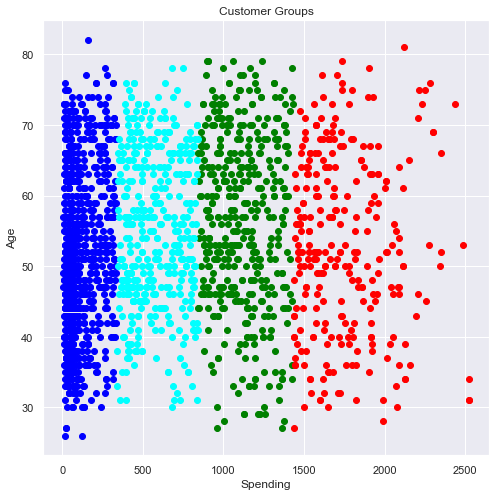

In [ ]:
#Visualizing the clusters
# Plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(x3[y3==0,0], x3[y3==0,1], c='green', label='Cluster1')
plt.scatter(x3[y3==1,0], x3[y3==1,1], c='blue', label='Cluster2')
plt.scatter(x3[y3==2,0], x3[y3==2,1], c='red', label='Cluster3')
plt.scatter(x3[y3==3,0], x3[y3==3,1], c='cyan', label='Cluster4')

#In case more clusters required
#plt.scatter(x[y==4,0], x[y==4,1], c='violet', label='Cluster1')
#plt.scatter(x[y==5,0], x[y==5,1], c='yellow', label='Cluster2')
#plt.scatter(x[y==6,0], x[y==6,1], c='purple', label='Cluster3')
#plt.scatter(x[y==7,0], x[y==7,1], c='orange', label='Cluster4')
#plt.scatter(x[y==8,0], x[y==8,1], c='black', label='Cluster3')
#plt.scatter(x[y==9,0], x[y==9,1], c='blue', label='Cluster4')

plt.title('Customer Groups')
plt.xlabel('Spending')
plt.ylabel('Age')
plt.show()

# 4.  Income vs Age vs total spend

In [ ]:
# Taking 3 columns into consideration and creating 3D plot
x = df2[['Income','Total_spend','Age']]

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

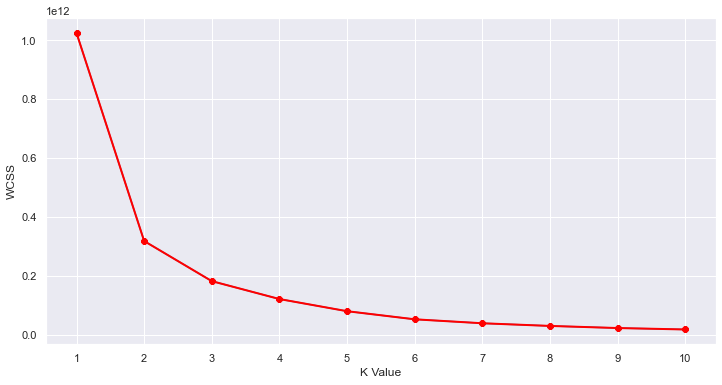

In [ ]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

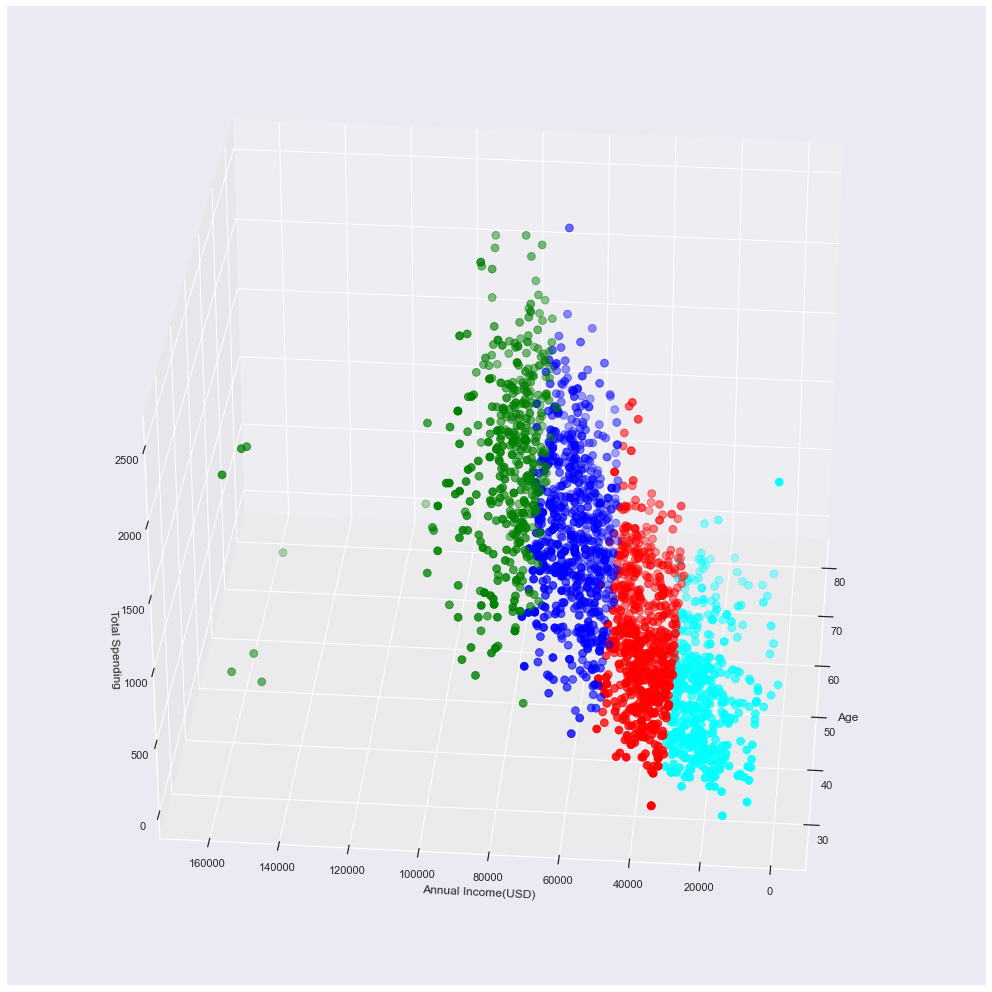

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df2.iloc[:,1:])
df2["cluster_type4"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.cluster_type4 == 0], df2["Income"][df2.cluster_type4 == 0], df2["Total_spend"][df2.cluster_type4 == 0], c='blue', s=60)
ax.scatter(df2.Age[df2.cluster_type4 == 1], df2["Income"][df2.cluster_type4 == 1], df2["Total_spend"][df2.cluster_type4 == 1], c='red', s=60)
ax.scatter(df2.Age[df2.cluster_type4 == 2], df2["Income"][df2.cluster_type4 == 2], df2["Total_spend"][df2.cluster_type4 == 2], c='green', s=60)
ax.scatter(df2.Age[df2.cluster_type4 == 3], df2["Income"][df2.cluster_type4 == 3], df2["Total_spend"][df2.cluster_type4 == 3], c='cyan', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income(USD)")
ax.set_zlabel('Total Spending')
plt.show()

In [ ]:
df2

,ID,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,weekday,Age,Total_spend,Total_childrens,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster_type1,cluster_type2,cluster_type3,cluster_type4
0,5524,58138.0,0,0,58,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,4,0,65,1617,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,2,2,0
1,2174,46344.0,1,1,38,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,8,6,68,27,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,4141,71613.0,0,0,26,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,2,57,776,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,2,3,0
3,6182,26646.0,1,0,26,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,10,3,38,53,1,0,0,1,0,0,0,0,0,0,0,1,0,0,3,3,1,3
4,5324,58293.0,1,0,94,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,6,41,422,1,0,0,0,0,1,0,0,0,1,0,0,0,0,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,46,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,3,55,1341,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,2,0,0
2236,4001,64014.0,2,1,56,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,10,0,76,444,3,0,0,0,0,1,0,0,0,0,0,1,0,0,2,2,3,0
2237,7270,56981.0,0,0,91,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,5,41,1241,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,2,0,0
2238,8235,69245.0,0,1,8,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,4,66,843,1,0,0,0,1,0,0,0,0,0,0,1,0,0,2,2,0,0


In [ ]:
df2['cluster_type1'].value_counts(), df2['cluster_type2'].value_counts(), df2['cluster_type3'].value_counts(), df2['cluster_type4'].value_counts()

(0    677
 2    670
 3    459
 1    406
 Name: cluster_type1, dtype: int64,
 0    677
 2    670
 3    459
 1    406
 Name: cluster_type2, dtype: int64,
 1    1057
 0     451
 3     423
 2     281
 Name: cluster_type3, dtype: int64,
 1    676
 0    671
 3    460
 2    405
 Name: cluster_type4, dtype: int64)

### Comparing cluster1 with cluster2

In [ ]:
import sklearn
sklearn.metrics.homogeneity_score(df2['cluster_type1'], df2['cluster_type2'])

1.0

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(df2['cluster_type1'],df2['cluster_type2']))
print(classification_report(df2['cluster_type1'],df2['cluster_type2']))

ConfusionMatrix [[677   0   0   0]
 [  0 406   0   0]
 [  0   0 670   0]
 [  0   0   0 459]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       677
           1       1.00      1.00      1.00       406
           2       1.00      1.00      1.00       670
           3       1.00      1.00      1.00       459

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212



### Comparing cluster1 with cluster3

In [ ]:
import sklearn
sklearn.metrics.homogeneity_score(df2['cluster_type1'], df2['cluster_type3'])

0.3432807160895293

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(df2['cluster_type1'],df2['cluster_type3']))
print(classification_report(df2['cluster_type1'],df2['cluster_type3']))

ConfusionMatrix [[ 20 517   1 139]
 [161   5 202  38]
 [270  90  77 233]
 [  0 445   1  13]]
              precision    recall  f1-score   support

           0       0.04      0.03      0.04       677
           1       0.00      0.01      0.01       406
           2       0.27      0.11      0.16       670
           3       0.03      0.03      0.03       459

    accuracy                           0.05      2212
   macro avg       0.09      0.05      0.06      2212
weighted avg       0.10      0.05      0.07      2212



### Comparing cluster1 or 2 with cluster4

In [ ]:
sklearn.metrics.homogeneity_score(df2['cluster_type1'], df2['cluster_type4'])

0.9951398943338973

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(df2['cluster_type1'],df2['cluster_type4']))
print(classification_report(df2['cluster_type1'],df2['cluster_type4']))

ConfusionMatrix [[  0 676   0   1]
 [  1   0 405   0]
 [670   0   0   0]
 [  0   0   0 459]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.00      0.00      0.00       406
           2       0.00      0.00      0.00       670
           3       1.00      1.00      1.00       459

    accuracy                           0.21      2212
   macro avg       0.25      0.25      0.25      2212
weighted avg       0.21      0.21      0.21      2212



### Comparing cluster 3 and cluster 4

In [ ]:
sklearn.metrics.homogeneity_score(df2['cluster_type3'], df2['cluster_type4'])

0.37237427497983894

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(df2['cluster_type3'],df2['cluster_type4']))
print(classification_report(df2['cluster_type3'],df2['cluster_type4']))

ConfusionMatrix [[271  20 160   0]
 [ 90 516   5 446]
 [ 77   1 202   1]
 [233 139  38  13]]
              precision    recall  f1-score   support

           0       0.40      0.60      0.48       451
           1       0.76      0.49      0.60      1057
           2       0.50      0.72      0.59       281
           3       0.03      0.03      0.03       423

    accuracy                           0.45      2212
   macro avg       0.42      0.46      0.42      2212
weighted avg       0.52      0.45      0.46      2212



### Note: Out of the 4 clusters; type1, type2 and type4 are very much similar and hence can be selected as the most efficient cluster for segmenting customers.

--------------------------------------------------------------------------------------------------